<a href="https://colab.research.google.com/github/shreyasacharya1/Bio_Inspired_Systems/blob/main/bis_cie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 1: Best threshold (gbest) = 131
Iteration 2: Best threshold (gbest) = 134
Iteration 3: Best threshold (gbest) = 134
Iteration 4: Best threshold (gbest) = 134
Iteration 5: Best threshold (gbest) = 134
Iteration 6: Best threshold (gbest) = 134
Iteration 7: Best threshold (gbest) = 134
Iteration 8: Best threshold (gbest) = 134
Iteration 9: Best threshold (gbest) = 134
Iteration 10: Best threshold (gbest) = 134
Iteration 11: Best threshold (gbest) = 134
Iteration 12: Best threshold (gbest) = 134
Iteration 13: Best threshold (gbest) = 134
Iteration 14: Best threshold (gbest) = 134
Iteration 15: Best threshold (gbest) = 134
Iteration 16: Best threshold (gbest) = 134
Iteration 17: Best threshold (gbest) = 134
Iteration 18: Best threshold (gbest) = 134
Iteration 19: Best threshold (gbest) = 134
Iteration 20: Best threshold (gbest) = 134
Iteration 21: Best threshold (gbest) = 134
Iteration 22: Best threshold (gbest) = 134
Iteration 23: Best threshold (gbest) = 134
Iteration 24: Best t

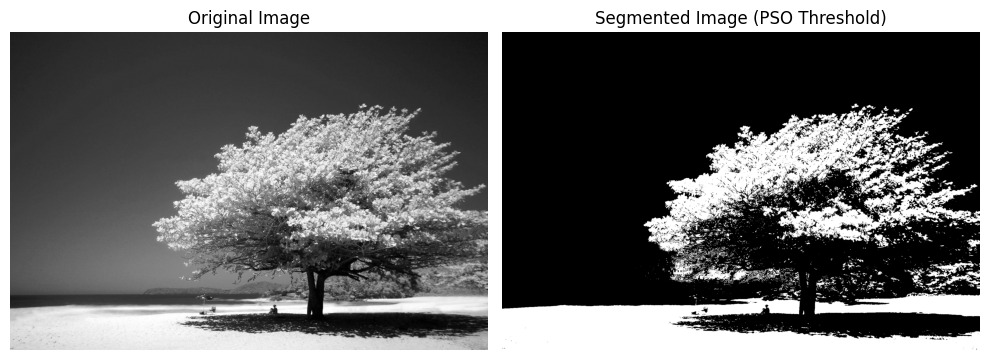

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def otsu_variance(img, t):
    # split image into two classes
    background = img[img <= t]
    foreground = img[img > t]

    if len(background) == 0 or len(foreground) == 0:
        return 0

    w0 = len(background) / img.size
    w1 = len(foreground) / img.size

    m0 = np.mean(background)
    m1 = np.mean(foreground)

    return w0 * w1 * (m0 - m1) ** 2


def pso_threshold(img, num_particles=20, max_iter=60): # Changed max_iter to 60
    # Initialize particles (thresholds)
    particles = np.random.randint(0, 256, num_particles)
    velocities = np.zeros(num_particles)

    pbest = particles.copy()
    pbest_fitness = np.array([otsu_variance(img, t) for t in particles])

    gbest = pbest[np.argmax(pbest_fitness)]
    gbest_fitness = np.max(pbest_fitness)

    w = 0.7   # inertia
    c1 = 1.5  # cognitive term
    c2 = 1.5  # social term

    for iteration in range(max_iter):
        for i in range(num_particles):
            r1, r2 = np.random.rand(), np.random.rand()

            # Update velocity
            velocities[i] = (w * velocities[i] +
                             c1 * r1 * (pbest[i] - particles[i]) +
                             c2 * r2 * (gbest - particles[i]))

            # Update position
            particles[i] = int(np.clip(particles[i] + velocities[i], 0, 255))

            # Recalculate fitness
            fitness = otsu_variance(img, particles[i])

            # Update pbest
            if fitness > pbest_fitness[i]:
                pbest[i] = particles[i]
                pbest_fitness[i] = fitness

        # Update gbest
        if np.max(pbest_fitness) > gbest_fitness:
            gbest = pbest[np.argmax(pbest_fitness)]
            gbest_fitness = np.max(pbest_fitness)

        print(f"Iteration {iteration+1}: Best threshold (gbest) = {gbest}") # Added print statement

    return gbest


# ---- MAIN ----
image_path = "input1.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    best_t = pso_threshold(image)
    print("Final Best threshold found:", best_t)

    _, output = cv2.threshold(image, best_t, 255, cv2.THRESH_BINARY)
    cv2.imwrite("pso_threshold_output.jpg", output)

    # Display original and segmented images using matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(output, cmap='gray')
    axes[1].set_title('Segmented Image (PSO Threshold)')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()